In [29]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [30]:
data = pd.read_csv("Hot100AudioFeatures.csv")
data

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_popularity,spotify_track_explicit,spotify_track_album,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,ApplauseLady Gaga,Lady Gaga,Applause,"['dance pop', 'pop']",5ka2ajep9OAvU5Sgduhiex,NaN,212333.0,71.0,False,ARTPOP,...,7.0,-4.287,0.0,0.0530,0.026500,0.000002,0.143,0.7380,139.945,4.0
1,Story Of My LifeOne Direction,One Direction,Story Of My Life,"['boy band', 'dance pop', 'pop', 'post-teen po...",4nVBt6MZDDP6tRVdQTgxJg,https://p.scdn.co/mp3-preview/e8cbef539a2a32de...,245493.0,81.0,False,Midnight Memories (Deluxe),...,3.0,-5.802,1.0,0.0477,0.225000,0.000000,0.119,0.2860,121.070,4.0
2,"Bang BangJessie J, Ariana Grande & Nicki Minaj","Jessie J, Ariana Grande & Nicki Minaj",Bang Bang,"['australian pop', 'dance pop', 'pop', 'pop ra...",0puf9yIluy9W0vpMEUoAnN,NaN,199386.0,79.0,False,Sweet Talker (Deluxe Version),...,0.0,-3.417,0.0,0.0909,0.260000,0.000000,0.380,0.7490,150.035,4.0
3,Summer SixteenDrake,Drake,Summer Sixteen,"['canadian hip hop', 'canadian pop', 'hip hop'...",17Q87zeXgsAi9iQQbMu9v0,NaN,202450.0,60.0,True,Summer Sixteen,...,1.0,-7.698,1.0,0.3930,0.003220,0.000037,0.154,0.0633,146.316,4.0
4,Castle On The HillEd Sheeran,Ed Sheeran,Castle On The Hill,"['pop', 'uk pop']",6PCUP3dWmTjcTtXY02oFdT,https://p.scdn.co/mp3-preview/beb4ed48cca5d2a7...,261153.0,80.0,False,÷ (Deluxe),...,2.0,-4.868,1.0,0.0989,0.023200,0.000011,0.140,0.4710,135.007,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28085,"Tonight, TonightThe Smashing Pumpkins",The Smashing Pumpkins,"Tonight, Tonight","['alternative metal', 'alternative rock', 'gru...",7bu0znpSbTks0O6I98ij0W,NaN,254626.0,69.0,False,Mellon Collie And The Infinite Sadness (Deluxe...,...,6.0,-9.381,1.0,0.0368,0.000063,0.748000,0.237,0.2220,148.928,4.0
28086,Tonight's The Night (Gonna Be Alright)Rod Stewart,Rod Stewart,Tonight's The Night (Gonna Be Alright),"['adult standards', 'mellow gold', 'soft rock']",10LRRKPmx8uHcSxLVWK0ct,https://p.scdn.co/mp3-preview/de4772519fbe8134...,237120.0,55.0,False,A Night on the Town (Deluxe Edition),...,11.0,-12.617,1.0,0.0523,0.336000,0.125000,0.382,0.7240,136.542,3.0
28087,Tonight's The NightBLACKstreet,BLACKstreet,Tonight's The Night,"['boy band', 'dance pop', 'hip hop', 'hip pop'...",3scEwKiAkfdPUdZ6k1AEoW,NaN,258026.0,32.0,False,Blackstreet,...,6.0,-5.561,0.0,0.0759,0.133000,0.000011,0.173,0.5910,76.060,4.0
28088,Tonight's The NightS.S.O.,S.S.O.,Tonight's The Night,[],5Gxa3zKb3xoS9G0y4fJnP1,https://p.scdn.co/mp3-preview/fb63477c965b182b...,170506.0,13.0,False,Funky Chicken: Belgian Grooves From The 70's,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
data= data.dropna()
data

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_popularity,spotify_track_explicit,spotify_track_album,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1,Story Of My LifeOne Direction,One Direction,Story Of My Life,"['boy band', 'dance pop', 'pop', 'post-teen po...",4nVBt6MZDDP6tRVdQTgxJg,https://p.scdn.co/mp3-preview/e8cbef539a2a32de...,245493.0,81.0,False,Midnight Memories (Deluxe),...,3.0,-5.802,1.0,0.0477,0.2250,0.000000,0.1190,0.2860,121.070,4.0
4,Castle On The HillEd Sheeran,Ed Sheeran,Castle On The Hill,"['pop', 'uk pop']",6PCUP3dWmTjcTtXY02oFdT,https://p.scdn.co/mp3-preview/beb4ed48cca5d2a7...,261153.0,80.0,False,÷ (Deluxe),...,2.0,-4.868,1.0,0.0989,0.0232,0.000011,0.1400,0.4710,135.007,4.0
6,All By MyselfCeline Dion,Celine Dion,All By Myself,"['canadian pop', 'dance pop']",0gsl92EMIScPGV1AU35nuD,https://p.scdn.co/mp3-preview/0cb37b13a22e1897...,312306.0,67.0,False,Falling into You,...,11.0,-10.005,0.0,0.0287,0.3480,0.023900,0.0686,0.0773,118.556,4.0
10,Strange CloudsB.o.B Featuring Lil Wayne,B.o.B Featuring Lil Wayne,Strange Clouds,"['atl hip hop', 'dance pop', 'hip hop', 'pop',...",0yQw3d0iQDjMrxaVHFv77J,https://p.scdn.co/mp3-preview/29376cadada3de68...,226293.0,61.0,True,Strange Clouds,...,8.0,-6.672,0.0,0.2860,0.0607,0.000000,0.1310,0.8000,73.726,4.0
14,ParisThe Chainsmokers,The Chainsmokers,Paris,"['electropop', 'pop', 'tropical house']",15vzANxN8G9wWfwAJLLMCg,https://p.scdn.co/mp3-preview/2524797ca9b06a15...,221520.0,77.0,False,Paris,...,2.0,-6.763,1.0,0.0310,0.0243,0.000000,0.0888,0.2510,99.999,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28081,Tonight TonightHot Chelle Rae,Hot Chelle Rae,Tonight Tonight,"['dance pop', 'neo mellow', 'neon pop punk', '...",2i0AUcEnsDm3dsqLrFWUCq,https://p.scdn.co/mp3-preview/fe0e72e95e0bc2b4...,200466.0,75.0,False,Whatever,...,4.0,-4.977,1.0,0.1190,0.0764,0.000000,0.1630,0.8140,99.978,4.0
28082,Tonight You're Gonna Fall In Love With MeThe S...,The Shirelles,Tonight You're Gonna Fall In Love With Me,"['adult standards', 'brill building pop', 'cla...",1OT98aV87tkMKUefcKOCiZ,https://p.scdn.co/mp3-preview/06a26a60a83af99c...,123200.0,10.0,False,20 Greatest Hits,...,0.0,-9.767,1.0,0.0362,0.7420,0.000000,0.6890,0.9650,141.836,4.0
28084,"Tonight, Tonight, TonightGenesis",Genesis,"Tonight, Tonight, Tonight","['album rock', 'art rock', 'classic rock', 'me...",3qmYlsTbC9CD9SGoVmaEDa,https://p.scdn.co/mp3-preview/6613aeb2ea3ca2fa...,530560.0,42.0,False,Invisible Touch,...,7.0,-14.405,1.0,0.0303,0.0158,0.014000,0.0849,0.3160,98.058,4.0
28086,Tonight's The Night (Gonna Be Alright)Rod Stewart,Rod Stewart,Tonight's The Night (Gonna Be Alright),"['adult standards', 'mellow gold', 'soft rock']",10LRRKPmx8uHcSxLVWK0ct,https://p.scdn.co/mp3-preview/de4772519fbe8134...,237120.0,55.0,False,A Night on the Town (Deluxe Edition),...,11.0,-12.617,1.0,0.0523,0.3360,0.125000,0.3820,0.7240,136.542,3.0


In [32]:
data.dtypes

SongID                        object
Performer                     object
Song                          object
spotify_genre                 object
spotify_track_id              object
spotify_track_preview_url     object
spotify_track_duration_ms    float64
spotify_track_popularity     float64
spotify_track_explicit        object
spotify_track_album           object
artist_genre                  object
danceability                 float64
energy                       float64
key                          float64
loudness                     float64
mode                         float64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
time_signature               float64
dtype: object

In [33]:
data1 = data[['danceability','energy','key','loudness', 'speechiness', 
            'acousticness','instrumentalness','liveness', 'valence','tempo']]

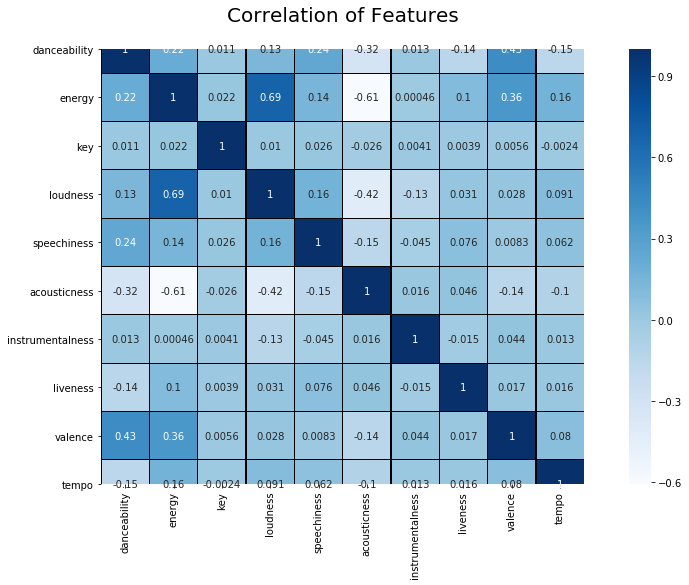

In [48]:
colormap = plt.cm.Blues
plt.figure(figsize=(16,8))
plt.title('Correlation of Features', y=1.05, size=20)
sns.heatmap(data1.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='black', annot=True)
plt.show()